<a href="https://colab.research.google.com/github/Khajauli/AI/blob/main/CelulasYOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#clonar YOLOv5 
!git clone https://github.com/ultralytics/yolov5  # clonar repo
%cd yolov5
%pip install -qr requirements.txt # instalar dependencias
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images
#sabemos que clase de gpu se nos ha asignado
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 12187, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 12187 (delta 30), reused 23 (delta 5), pack-reused 12124
Receiving objects: 100% (12187/12187), 12.57 MiB | 30.66 MiB/s, done.
Resolving deltas: 100% (8378/8378), done.
/content/yolov5
     |████████████████████████████████| 1.6 MB 13.9 MB/s 
     |████████████████████████████████| 145 kB 36.3 MB/s 
     |████████████████████████████████| 178 kB 60.6 MB/s 
     |████████████████████████████████| 1.1 MB 55.3 MB/s 
     |████████████████████████████████| 67 kB 8.0 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 138 kB 76.0 MB/s 
     |████████████████████████████████| 62 kB 1.0 MB/s 
Setup complete. Using torch 1.12.1+cu113 (Tesla T4)


In [2]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [3]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [4]:
#after following the link above, recieve python code with these fields filled in
from roboflow import Roboflow
rf = Roboflow(api_key="m1PM4vyYeMUQYtq5m7Br")
project = rf.workspace("rocha-zxgmt").project("mp-idb-the-malaria-parasite-image-database-for-image-processing-and-analysis-master")
dataset = project.version(1).download("yolov5")
#from roboflow import Roboflow
#rf = Roboflow(api_key="YOUR API KEY HERE")
#project = rf.workspace().project("YOUR PROJECT")
#dataset = project.version("YOUR VERSION").download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/MP-IDB-The-Malaria-Parasite-Image-Database-for-Image-Processing-and-Analysis-master-1 in yolov5pytorch:: 100%|██████████| 432/432 [00:00<00:00, 2027.69it/s]


# Step 3: Train Our Custom YOLOv5 model

Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** Our dataset locaiton is saved in the `dataset.location`
- **weights:** specify a path to weights to start transfer learning from. Here we choose the generic COCO pretrained checkpoint.
- **cache:** cache images for faster training

In [9]:
!python train.py --img 210 --batch 9 --epochs 80 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/MP-IDB-The-Malaria-Parasite-Image-Database-for-Image-Processing-and-Analysis-master-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=80, batch_size=9, imgsz=210, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-94-g1aea74c Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1

# Evaluate Custom YOLOv5 Detector Performance
Training losses and performance metrics are saved to Tensorboard and also to a logfile.

If you are new to these metrics, the one you want to focus on is `mAP_0.5` - learn more about mean average precision [here](https://blog.roboflow.com/mean-average-precision/).

In [10]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 397), started 0:07:12 ago. (Use '!kill 397' to kill it.)

<IPython.core.display.Javascript object>

#Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.

In [13]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 210 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/MP-IDB-The-Malaria-Parasite-Image-Database-for-Image-Processing-and-Analysis-master-1/test/images, data=data/coco128.yaml, imgsz=[210, 210], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-94-g1aea74c Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/21 /content/datasets/MP-IDB-The-Malaria-Parasite-Image-Database-for-Image-Processing-and-Analysis-master-1/test/images/1307210661-0006-R_jpg.rf.1a71862c10ccddadc3e53e94290ed744.jpg: 224x224 30 parasitas, 7.2ms
image 2/21 /content/datasets/MP-ID

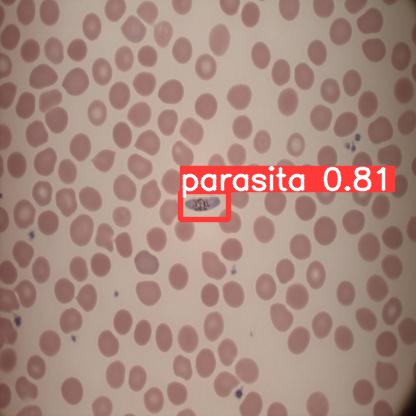

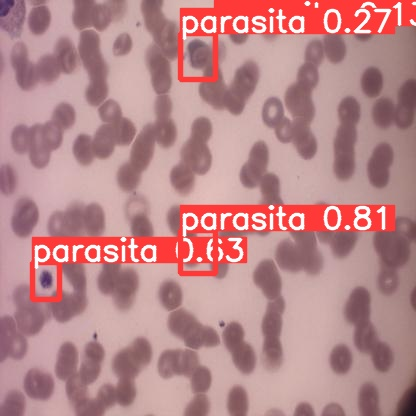

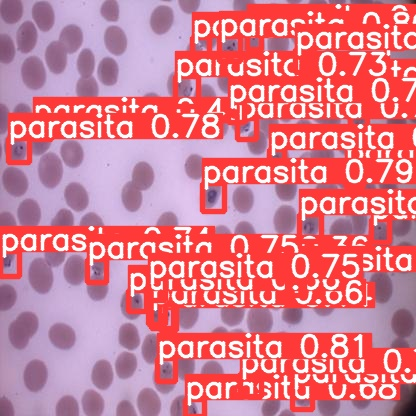

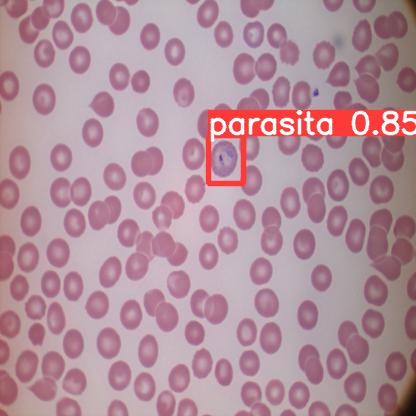

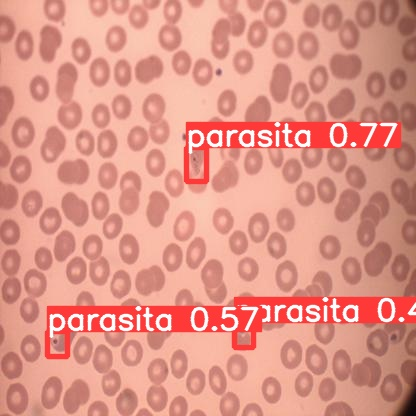

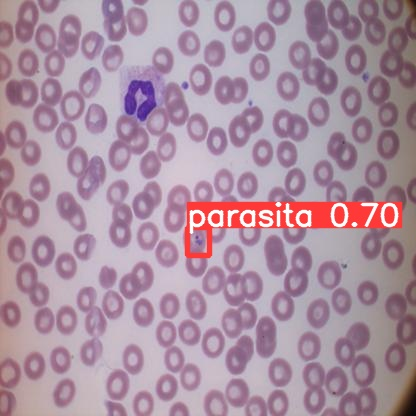

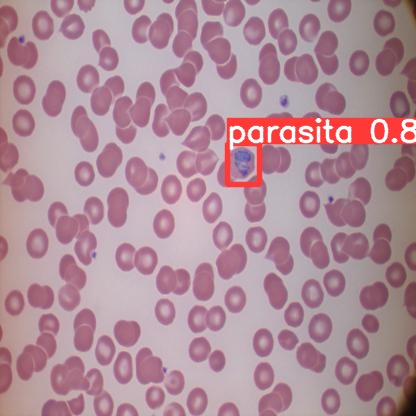

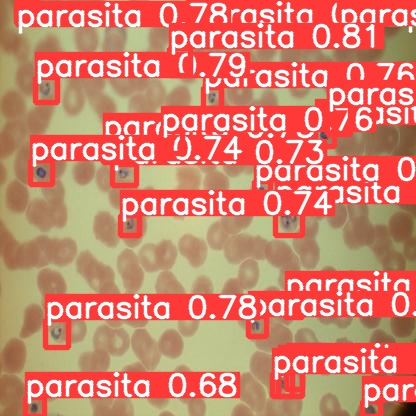

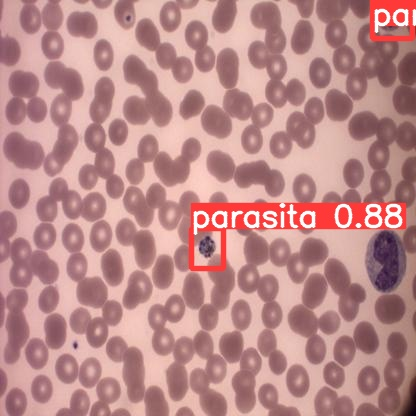

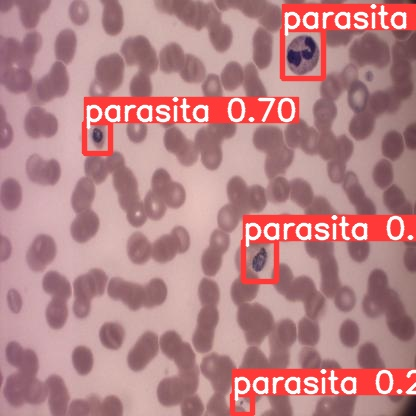

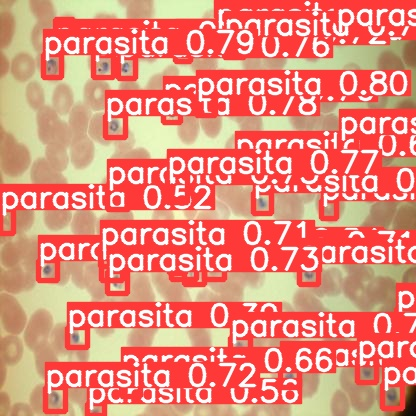

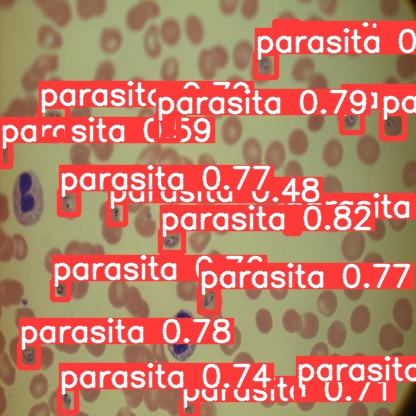

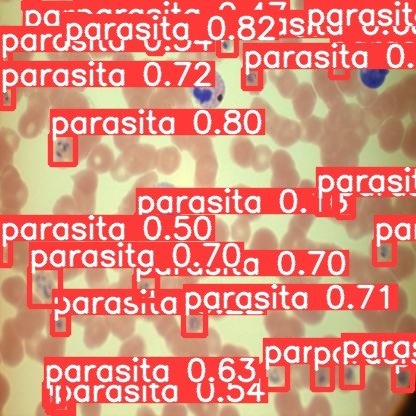

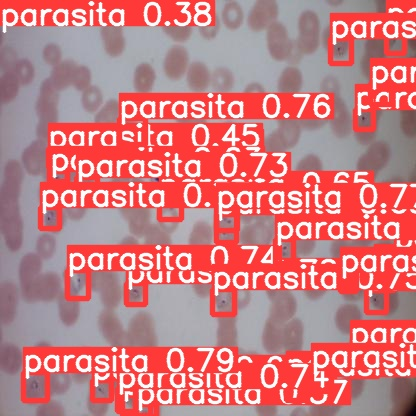

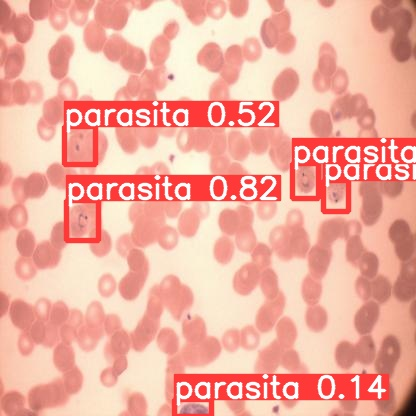

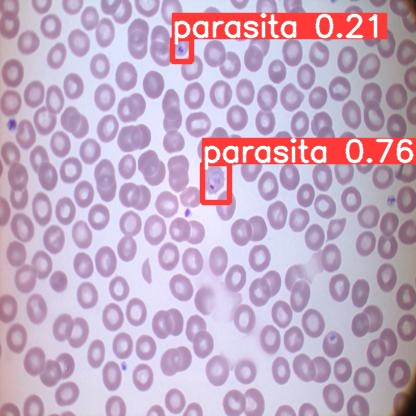

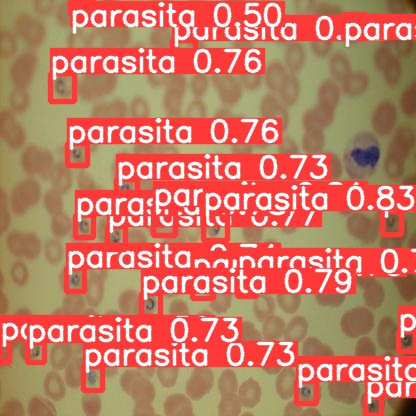

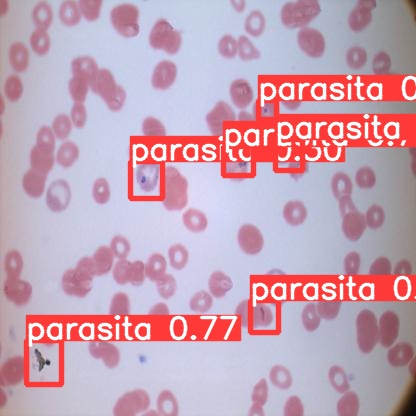

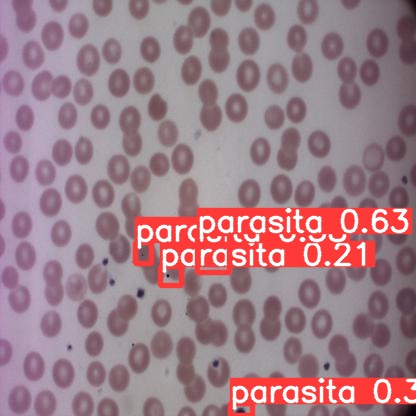

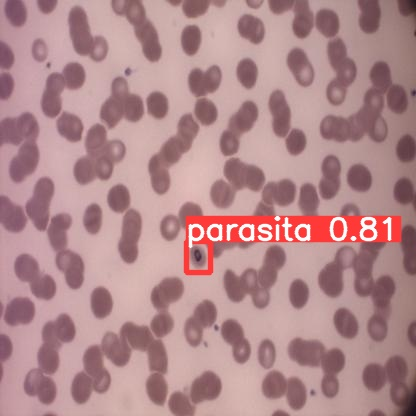

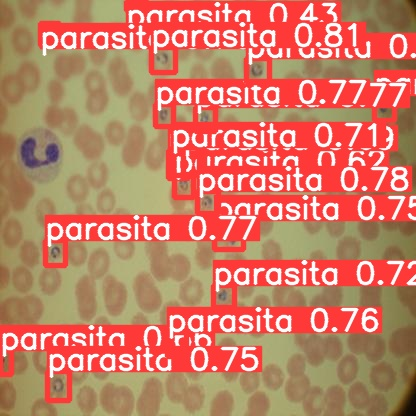

In [14]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

# Conclusion and Next Steps

Congratulations! You've trained a custom YOLOv5 model to recognize your custom objects.

To improve you model's performance, we recommend first interating on your datasets coverage and quality. See this guide for [model performance improvement](https://github.com/ultralytics/yolov5/wiki/Tips-for-Best-Training-Results).

To deploy your model to an application, see this guide on [exporting your model to deployment destinations](https://github.com/ultralytics/yolov5/issues/251).

Once your model is in production, you will want to continually iterate and improve on your dataset and model via [active learning](https://blog.roboflow.com/what-is-active-learning/).

In [ ]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>